In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(0.1307,0.3081)])
train_Data=datasets.MNIST(root='D:/Jupyter/dataset/mnist/',train=True,download=True,transform=transform)
test_Data=datasets.MNIST(root='D:/Jupyter/dataset/mnist/',train=False,download=True,transform=transform)

1.3%

100.0%


Extracting D:/Jupyter/dataset/mnist/MNIST\raw\train-images-idx3-ubyte.gz to D:/Jupyter/dataset/mnist/MNIST\raw



100.0%


Extracting D:/Jupyter/dataset/mnist/MNIST\raw\train-labels-idx1-ubyte.gz to D:/Jupyter/dataset/mnist/MNIST\raw



100.0%


Extracting D:/Jupyter/dataset/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to D:/Jupyter/dataset/mnist/MNIST\raw



100.0%

Extracting D:/Jupyter/dataset/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to D:/Jupyter/dataset/mnist/MNIST\raw


In [4]:
train_loader = DataLoader(train_Data,batch_size=64,shuffle=True)
test_loader = DataLoader(test_Data,batch_size=64,shuffle=False)

In [7]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN,self).__init__()
        self.net=nn.Sequential(
            nn.Flatten(),
            nn.Linear(784,512),nn.ReLU(),
            nn.Linear(512, 256),nn.ReLU(),
            nn.Linear(256,128),nn.ReLU(),
            nn.Linear(128,64),nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        y=self.net(x)
        return y

In [8]:
model=DNN().to('cuda:0')
model

DNN(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [9]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.5)

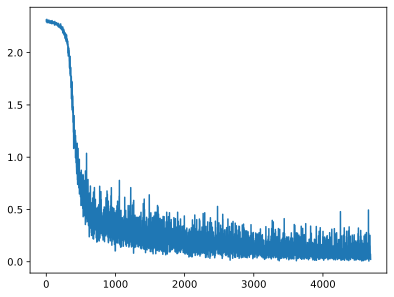

In [10]:
epochs=5
losses=[]
for epoch in range(epochs):
    for (x,y) in train_loader:
        x,y=x.to('cuda:0'),y.to('cuda:0')
        Pred=model(x)
        loss=loss_fn(Pred,y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
Fig=plt.figure()
plt.plot(range(len(losses)),losses)
plt.show()

In [12]:
correct=0
total=0
with torch.no_grad():
    for (x,y) in test_loader:
        x,y=x.to('cuda:0'), y.to('cuda:0')
        Pred=model(x)
        _, predicted = torch.max(Pred.data,1)
        correct+=torch.sum(predicted == y)
        total+=y.size(0)
print(f'测试集精准度: {100*correct/total} %')

测试集精准度: 96.93000030517578 %
